<a href="https://colab.research.google.com/github/Gabrieleas10/KC-House-Prices/blob/main/houses_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lux-widget -q
!pip install lux-api -q

     |████████████████████████████████| 2.2MB 3.9MB/s 
     |████████████████████████████████| 102kB 3.8MB/s 


In [ ]:
# importing libs

import lux
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
# load dataset

df = pd.read_csv('/content/kc_house_data.csv', sep =',')
df.head()

/usr/local/lib/python3.7/dist-packages/lux/executor/PandasExecutor.py:401: UserWarning:
Lux detects that attributes ['date', 'yr_built'] may be temporal.
To display visualizations for these attributes accurately, please convert temporal attributes to Pandas Datetime objects using the pd.to_datetime function and provide a 'format' parameter to specify the datetime format of the attribute.
For example, you can convert a year-only attribute (e.g., 1998, 1971, 1982) to Datetime type by specifying the `format` as '%Y'.

Here is a starter template that you can use for converting the temporal fields:
	df['date'] = pd.to_datetime(df['date'], format='<replace-with-datetime-format>')
	df['yr_built'] = pd.to_datetime(df['yr_built'], format='<replace-with-datetime-format>')

See more at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
If yr_built is not a temporal attribute, please use override Lux's automatically detected type:
	df.set_data_type({'yr_built':'qua

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

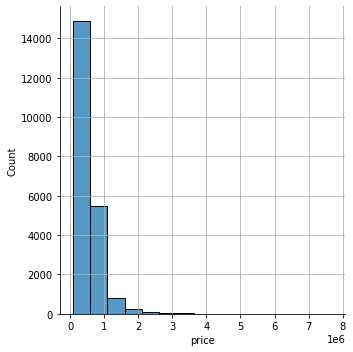

In [ ]:
# ploting price distribuition

sns.displot(data = df, x='price', bins = 15)
plt.grid()

In [ ]:
# label encoding zipcode

le = LabelEncoder()
le.fit(df['zipcode'])
df['zipcode'] = le.transform(df['zipcode'])

In [ ]:
# plot data correlation

matrix_corr = df.corr(method='spearman')
matrix_corr = matrix_corr['price'].sort_values(ascending=False)
print(matrix_corr)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Text(0.5, 1.0, 'Data Correlation')

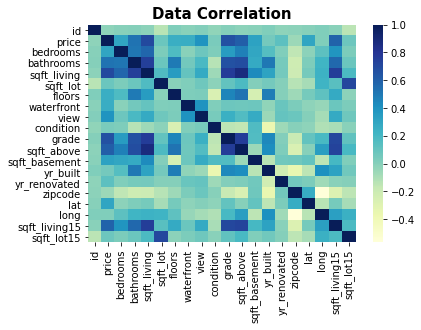

In [ ]:
# heatmap data correlation of each column

matrix_corr = df.corr()
sns.heatmap(matrix_corr,
            xticklabels = matrix_corr.columns,
            yticklabels = matrix_corr.columns , cmap = 'YlGnBu' )
plt.title('Data Correlation' , size = 15 , weight = 'bold')

In [ ]:
# selecting best features

features = df.iloc[: ,3:17]

label = df['price'].values

In [ ]:
# scalling features

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [ ]:
# dimension reducing in components

X = np.matrix(features)

pca = PCA(n_components=4)
pca.fit(X)

components = np.round(pca.explained_variance_ratio_ , 2)
print(components)

[0.32 0.14 0.1  0.08]


In [ ]:
# inputing the new features in dataframe

pca_1 = pca.transform(X)[:,0]
pca_2 = pca.transform(X)[:,1]
pca_3 = pca.transform(X)[:,2]
pca_4 = pca.transform(X)[:,3]

df['PCA1'] = pca_1
df['PCA2'] = pca_2
df['PCA3'] = pca_3
df['PCA4'] = pca_4

In [ ]:
features = df[['PCA1','PCA2','PCA3','PCA4','grade']]

In [ ]:
# splitting the features

train_features, test_features, train_labels, test_labels = train_test_split(features , label, 
                                                                            test_size = 0.25, 
                                                                            random_state = 0)

In [ ]:
# testing lr model

reg = LinearRegression()
reg.fit(train_features , train_labels)
predictions = reg.predict(test_features)

In [ ]:
# The coefficients

print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 95759.72315323  86840.19181052   3940.70790799  74934.58376477
 -13946.74729087  93075.58557437 -11134.70796546  75532.48952584
  40004.35910113]


In [ ]:
# evaluating model

mae = mean_absolute_error(test_labels , predictions)
mse = mean_squared_error(test_labels , predictions)
print('Coefficient of determination: %.2f'
      % r2_score(test_labels , predictions))
print('Linear Regression MAE: ', mae)
print('Linear Regression MSE: ', mse)

Coefficient of determination: 0.63
Linear Regression MAE:  135651.73997955734
Linear Regression MSE:  48778769188.02147


In [ ]:
# test all hyperparams below

param_grid = [{'n_estimators':[35,40,45,50,55,60,70,80,90,100,150,180,220,250,280],
               'max_depth':[5,6,7,8,9,10,11,12]}]

# building the regressor
reg = sklearn.ensemble.RandomForestRegressor()

# finding best hyperparams

GS = GridSearchCV(reg , param_grid , scoring= 'neg_mean_absolute_error' , error_score= 'raise', cv=3)
GS.fit(train_features, train_labels)
print(GS.best_params_)

{'max_depth': 12, 'n_estimators': 220}


In [ ]:
# testing random forest model

reg = RandomForestRegressor(n_estimators = GS.best_params_['n_estimators'] , 
                            max_depth = GS.best_params_['max_depth'])
reg.fit(train_features , train_labels)
predictions = reg.predict(test_features)

In [ ]:
# evaluating model

mae = mean_absolute_error(test_labels , predictions)
mse = mean_squared_error(test_labels , predictions)
print('Coefficient of determination: %.2f'
      % r2_score(test_labels , predictions))
print('Random Forest Regression MAE: ', mae)
print('Random Forest Regression MSE: ', mse)

Coefficient of determination: 0.63
Random Forest Regression MAE:  135651.73997955734
Random Forest Regression MSE:  48778769188.02147


In [ ]:
# test all hyperparams below

param_grid = [{'max_depth':[4,5,6,7,8,9,10,11,12,13],
               'n_estimators':[150,180,200,220],
               'objective':['reg:squarederror'],
               'eval_metric':['mae'],
               'booster':['gbtree'],
               'learning_rate':[0.5,0.7,0.9]}]

reg = XGBRegressor()

# finding best hyperparams

GS = GridSearchCV(reg , param_grid , scoring= 'neg_mean_squared_error' , error_score= 'raise' , cv =3)
GS.fit(train_features, train_labels)
print(GS.best_params_)

{'booster': 'gbtree', 'eval_metric': 'mae', 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150, 'objective': 'reg:squarederror'}


In [ ]:
# testing xgboost model

reg = XGBRegressor(n_estimators = GS.best_params_['n_estimators'] , 
                            max_depth = GS.best_params_['max_depth'],
                   objective = GS.best_params_['objective'],
                   eval_metric = GS.best_params_['eval_metric'],
                   booster = GS.best_params_['booster'],
                   learning_rate = GS.best_params_['learning_rate'])

reg.fit(train_features , train_labels)
predictions = reg.predict(test_features)

In [ ]:
# evaluating model

mae = mean_absolute_error(test_labels , predictions)
mse = mean_squared_error(test_labels , predictions)
print('Coefficient of determination: %.2f'
      % r2_score(test_labels , predictions))
print('XGBoost MAE: ', mae)
print('XGBoost MSE: ', mse)

XGBoost MAE:  95046.63334595901
XGBoost MSE:  28050141073.794792
